# 요약

* Autoencoder(Dense layer로만)를 이용하여 Lorentzian 중첩 그래프의 재생 성공
* 하지만 이걸로 뭘 할 수 있지?....



In [0]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
N = 5  # Maximum number of possible peak
Data_size = 300000  

Parameters = np.zeros((Data_size, N, 2))  # Set of Parameters ready
print(Parameters.shape[1])

5


In [0]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] ** 2 / ((x - a[i])**2 + b[i]**2)
    return result 

In [4]:
# X domain fixed
x = np.arange(-2, 2, 0.01)
print(len(x))

400


In [5]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        Parameters[i][j] = np.array([[np.random.rand(), 0.1*np.random.rand() + 0.1]])
    
# Check out
print(Parameters)

[[[0.83739995 0.17819493]
  [0.11298956 0.11375328]
  [0.50592867 0.13510967]
  [0.68201203 0.11472146]
  [0.88565384 0.11010105]]

 [[0.61464426 0.12101743]
  [0.72570074 0.16197723]
  [0.61589518 0.19707799]
  [0.58376649 0.11342328]
  [0.20709504 0.12830368]]

 [[0.26472691 0.1568763 ]
  [0.62124901 0.19551447]
  [0.18973212 0.11637309]
  [0.39865872 0.19475708]
  [0.9239377  0.10216069]]

 ...

 [[0.45392901 0.10943855]
  [0.83903153 0.19630755]
  [0.35304069 0.14968956]
  [0.35242963 0.14296241]
  [0.83041885 0.14696095]]

 [[0.62114768 0.16164435]
  [0.42458323 0.12445698]
  [0.34186    0.13231913]
  [0.94434632 0.16434924]
  [0.7725481  0.10184162]]

 [[0.88779607 0.16357056]
  [0.2967932  0.18886115]
  [0.38958409 0.1869537 ]
  [0.08765442 0.13659302]
  [0.09984208 0.10474217]]]


In [0]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(2, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    # 적분값(sum), peak수, peak 위치를 라벨로 활용
    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak, j[0], 0, 0, 0, 0]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:4])), peak, j[0], j[2], 0, 0, 0 ]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])), peak, j[0], j[2], j[4], 0, 0 ]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak, j[0], j[2], j[4], j[6], 0]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak, j[0], j[2], j[4], j[6], j[8] ]))



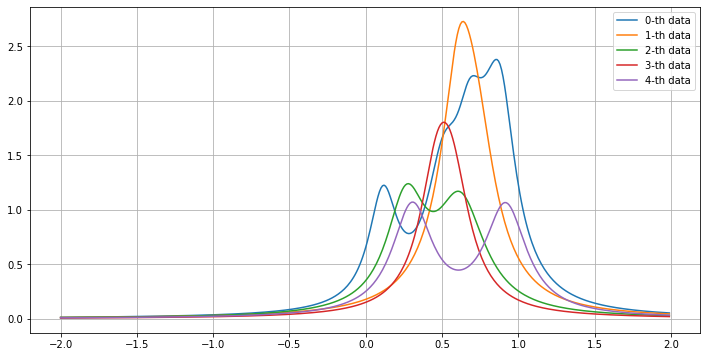

In [7]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(5):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [8]:
for i in range(20):
    print(sum(Data_x[i]), len(list(filter(lambda x:x > 0, Data_y[i]))) /2)

194.7133439090826 3.5
141.91029032008348 2.5
103.98895157384636 2.0
87.025938637825 2.0
96.88262911427192 2.0
87.63810299397285 2.0
91.31746281195646 2.0
127.93024886005476 2.5
190.55560289715984 3.0
210.2902441625068 3.5
146.83700819053263 2.5
221.1434845717646 3.5
89.91811007722958 2.0
245.04881995288886 3.5
206.5938847156052 3.5
243.9041404764444 3.5
208.5895856937519 3.5
237.54954111443618 3.5
168.34840943344423 3.0
87.81255300050017 2.0


In [0]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:150000])
val_data = np.array(Data_x[150000:250000])
test_data = np.array(Data_x[250000:])

train_labels = np.array(Data_y[:150000])
val_labels = np.array(Data_y[150000:250000])
test_labels = np.array(Data_y[250000:])

In [10]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(150000, 400) (150000, 7)
(100000, 400) (100000, 7)
(50000, 400) (50000, 7)


In [11]:
# ========== Autoencoder activate ==========

# 코랩에서는 다음 코드로 베타버전을 설치한다.
!pip install tensorflow-gpu==2.0.0-rc
!apt install -y -q fonts-nanum

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 501kB 42.7MB/s 
     |████████████████████████████████| 4.3MB 41.4MB/s 
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 43 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,648 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 144328 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170

In [0]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

import tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

In [17]:
# 위에서 생성한 데이터셋을 이용하여 오토인코더를 실행한다.
# Unsupervised learning 이므로 라벨 데이터는 필요없다.

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

autoencoder1 = Sequential()
autoencoder1.add(Dense(100, input_dim=400, activation='relu'))
autoencoder1.add(Dense(20, activation='relu'))
autoencoder1.add(Dense(100, activation='relu'))
autoencoder1.add(Dense(400))
autoencoder1.compile(optimizer="adam", loss="mse", metric=['mae'])

autoencoder1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_5 (Dense)              (None, 400)               40400     
Total params: 84,620
Trainable params: 84,620
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
history = autoencoder1.fit(train_data, train_data, epochs=30, batch_size=2000, 
                           validation_data = (val_data, val_data),
                           verbose=2)

Train on 150000 samples, validate on 100000 samples
Epoch 1/30
150000/150000 - 2s - loss: 0.1332 - val_loss: 0.0258
Epoch 2/30
150000/150000 - 1s - loss: 0.0117 - val_loss: 0.0073
Epoch 3/30
150000/150000 - 1s - loss: 0.0053 - val_loss: 0.0040
Epoch 4/30
150000/150000 - 1s - loss: 0.0034 - val_loss: 0.0026
Epoch 5/30
150000/150000 - 1s - loss: 0.0023 - val_loss: 0.0021
Epoch 6/30
150000/150000 - 1s - loss: 0.0020 - val_loss: 0.0019
Epoch 7/30
150000/150000 - 1s - loss: 0.0018 - val_loss: 0.0016
Epoch 8/30
150000/150000 - 1s - loss: 0.0014 - val_loss: 0.0012
Epoch 9/30
150000/150000 - 1s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/30
150000/150000 - 1s - loss: 0.0011 - val_loss: 9.8121e-04
Epoch 11/30
150000/150000 - 1s - loss: 9.7846e-04 - val_loss: 8.9564e-04
Epoch 12/30
150000/150000 - 1s - loss: 8.6447e-04 - val_loss: 8.0347e-04
Epoch 13/30
150000/150000 - 1s - loss: 7.8477e-04 - val_loss: 7.5748e-04
Epoch 14/30
150000/150000 - 1s - loss: 7.0278e-04 - val_loss: 6.5614e-04
Epoch 15/30

In [0]:
import matplotlib as mpl
import matplotlib.pylab as plt

mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)
mpl.rc('figure', dpi=300)

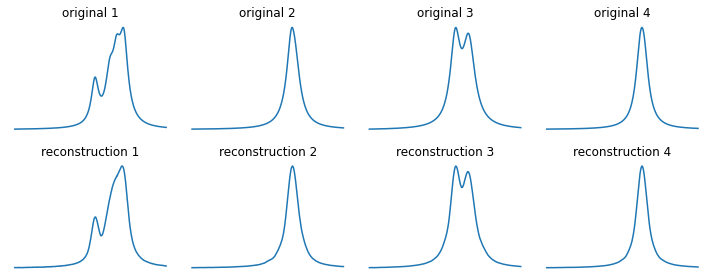

In [20]:
%matplotlib inline

n = 4
train_data_recoverd = autoencoder1.predict(train_data[:n, :])
plt.figure(figsize=(10, 4))
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.plot(train_data[i, :])
    plt.title("original {}".format(i + 1))
    plt.gray(); 
    plt.axis("off")
    
    plt.subplot(2, n, i + 1 + n)
    plt.plot(train_data_recoverd[i, :])
    plt.title("reconstruction {}".format(i + 1))
    plt.gray(); 
    plt.axis("off")

plt.tight_layout()
plt.show()